## Problem 3.2

(a)ポテンシャルの具体形は
$$
\begin{gather}
\Phi = 
\frac{Q}{8\pi \epsilon_0} \sum_{l=0}^\infty [P_{l+1}(\cos\alpha) - P_{l-1}(\cos\alpha)] 
\left\{
\begin{aligned}
\frac{r^l}{R^{l+1}} \\
\frac{R^l}{r^{l+1}}
\end{aligned}
\right\}
P_l(\cos\theta)
\end{gather}
$$
で与えられる．これを図示してみる．
$\Phi$は$Q/(4\pi\epsilon_0)$を単位にする．
また，簡単のために$P_{-1}(\cos\alpha) = -1$と約束をする．

In [65]:
##--- common ---##
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import quad

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 100# grid number per 1 unit length
rd = 1.0# radius of sphere
lmax = 70# number of terms
alpha = np.pi/4.0 # angle of spherical cap at north pole
cos_alpha = np.cos(alpha)

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#
CC0 = 0.5*(cos_alpha+1.0)

phi_in = np.full_like(xx,CC0/rd)
phi_out = np.full_like(xx,CC0/rr)

for l in range(1,lmax+1):
    P_l = sp.legendre(l)
    P_lm1 = sp.legendre(l-1)# P_{l-1}
    P_lp1 = sp.legendre(l+1)# P_{l+1}

    CC = 0.5 * (P_lp1(cos_alpha) - P_lm1(cos_alpha))

    term_in = CC * rr**l / rd**(l+1) * P_l(cos_th)
    term_out = CC * rd**l / rr**(l+1) * P_l(cos_th)
    phi_in += term_in
    phi_out += term_out


phi = np.where(rr <= rd, phi_in, phi_out)
#phi = np.where(rr <= rd, np.nan, phi_out)


#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
tle = "Potential with north cap;\n" + r"($\alpha = \pi/4$)"
ax.set_title(tle)

sphere = plt.Circle((0, 0), rd, fill=False, edgecolor='gray', zorder=10)
ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,zz,phi,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5,levels=np.linspace(0,1.0,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

plt.savefig('3-2_normal.png',dpi=300,bbox_inches='tight')
plt.show()

- $\alpha$が十分に小さいときのやつ

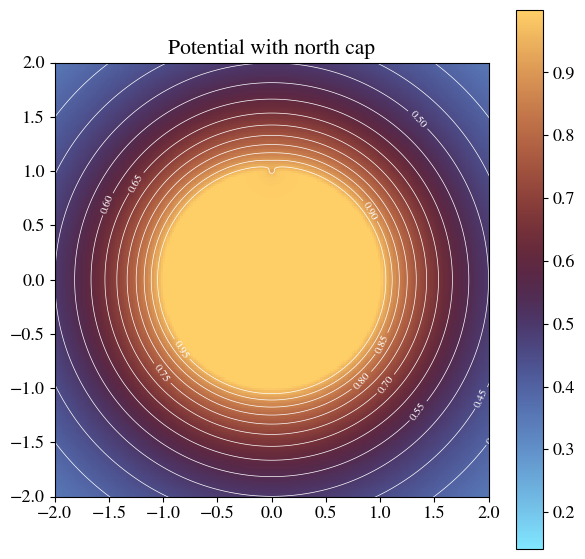

In [53]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 50# grid number per 1 unit length
rd = 1.0# radius of sphere
lmax = 90# number of terms
alpha = np.pi/50 #np.pi / 10. # angle of spherical cap at north pole
cos_alpha = np.cos(alpha)

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#
term0 = 0.5*(cos_alpha+1.0)

phi_in = 1/rd - alpha**2/4/np.sqrt(xx**2+(zz-rd)**2)
phi_out = 1/rr -  alpha**2/4/np.sqrt(xx**2+(zz-rd)**2)



#phi = np.where(rr <= rd, phi_in, phi_out)
phi = np.where(rr <= rd, phi_in, phi_out)


#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
tle = "Potential with north cap"
ax.set_title(tle)

#sphere = plt.Circle((0, 0), rd, color='gray', zorder=10)
#ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,zz,phi,vmin=0,vmax=1.0,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5,levels=np.linspace(0,1.0,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-2_top.png',dpi=300,bbox_inches='tight')
plt.show()

- $\beta \equiv \pi - \alpha$が十分に小さいときのやつ

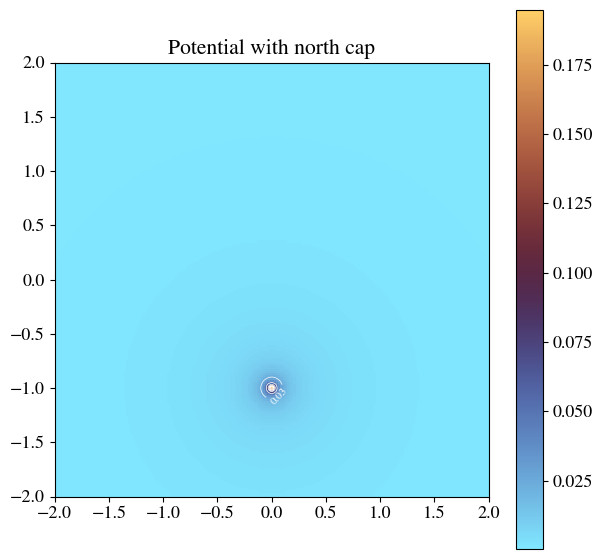

In [61]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 50# grid number per 1 unit length
rd = 1.0# radius of sphere
lmax = 90# number of terms
alpha = np.pi-0.1 #np.pi / 10. # angle of spherical cap at north pole
beta = np.pi - alpha
cos_alpha = np.cos(alpha)

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#
term0 = 0.5*(cos_alpha+1.0)

phi_in = 0.25 * beta**2/np.sqrt(xx**2+(zz+rd)**2)
phi_out = phi_in



#phi = np.where(rr <= rd, phi_in, phi_out)
phi = np.where(rr <= rd, phi_in, phi_out)


#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
tle = "Potential with north cap"
ax.set_title(tle)

#sphere = plt.Circle((0, 0), rd, color='gray', zorder=10)
#ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,zz,phi,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5)
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-2_bottom.png',dpi=300,bbox_inches='tight')
plt.show()